In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data=pd.read_csv("/content/drive/My Drive/assignment/06Oct/cars-dataset.csv")

In [64]:
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [65]:
data.describe()

,cyl,disp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,46.600000


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [67]:
data.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [0]:
temp = pd.DataFrame(data.hp.str.isdigit())

In [69]:
temp[temp["hp"]==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [0]:
data = data.replace('?', np.nan)

In [71]:
data.isnull().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [72]:
data[data.isnull().any(axis=1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [73]:
data.iloc[32,3]

nan

In [0]:
md=data["hp"].median()

In [0]:
data["hp"] = data["hp"].fillna(data["hp"].median())

In [76]:
data.iloc[32,3]

93.5

In [0]:
data_att=data.drop("car name",axis=1)

In [82]:
data_att.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [0]:
data_att.hp=data_att.hp.astype("float64")

In [89]:
data_att.dtypes

cyl       int64
disp    float64
hp      float64
wt        int64
acc     float64
yr        int64
mpg     float64
dtype: object

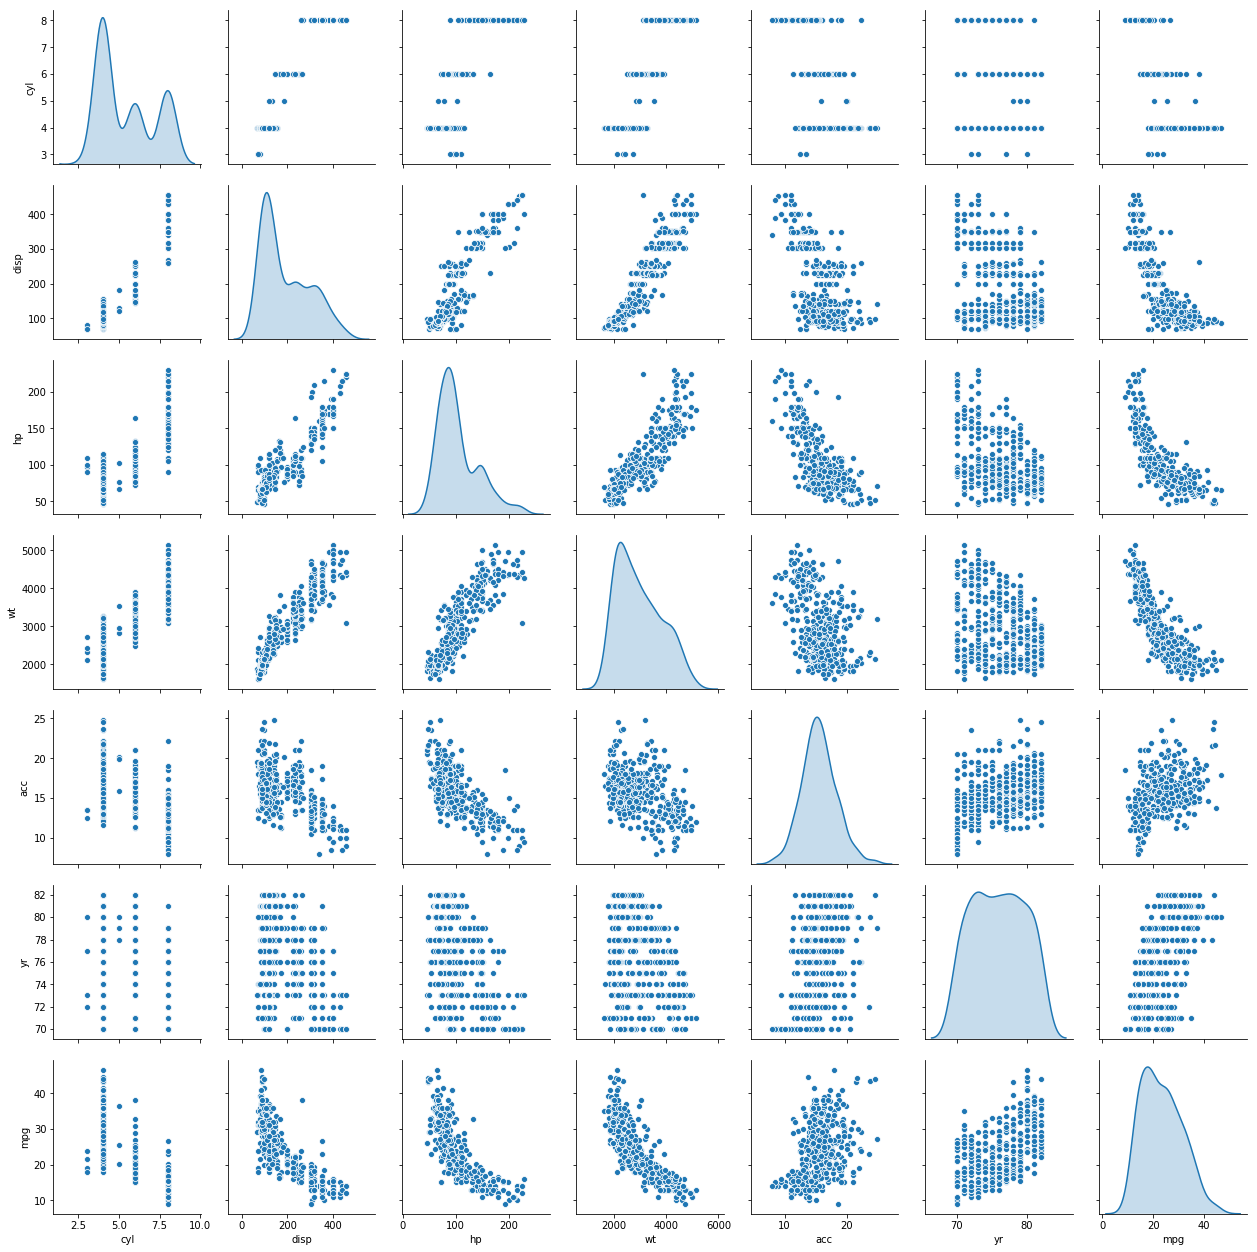

In [90]:
sns.pairplot(data_att, diag_kind ='kde')

In [0]:
from scipy.stats import zscore
data_att_z = data_att.apply(zscore)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [0]:
cluster_range = range( 2, 12) 
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(data_att_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )


In [99]:
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1295.122935
1,3,946.019791
2,4,738.392328
3,5,664.832272
4,6,594.989782
5,7,541.404057
6,8,501.935066
7,9,468.123494
8,10,433.265456
9,11,405.080472


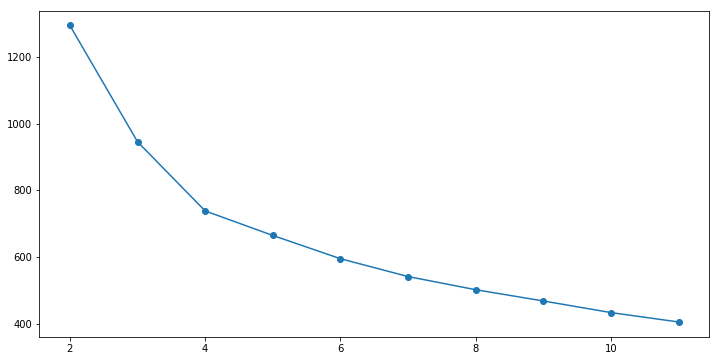

In [100]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [101]:
#Number of clusters=4
cluster = KMeans( n_clusters = 4)
cluster.fit(data_att_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [102]:
centroids = cluster.cluster_centers_
centroids

array([[-0.85043429, -0.79990271, -0.55557971, -0.75486144,  0.32419661,
        -0.65531123,  0.19746294],
       [ 1.49819126,  1.50392292,  1.52168282,  1.40409797, -1.0861486 ,
        -0.68832385, -1.16379715],
       [-0.82534015, -0.78164519, -0.74051725, -0.76856959,  0.37498307,
         1.10179281,  1.18017325],
       [ 0.42558031,  0.30810076, -0.03401386,  0.34575408,  0.29922485,
         0.05143538, -0.49876792]])

In [103]:
centroid_df = pd.DataFrame(centroids, columns = list(data_att_z) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,-0.850434,-0.799903,-0.555580,-0.754861,0.324197,-0.655311,0.197463
1,1.498191,1.503923,1.521683,1.404098,-1.086149,-0.688324,-1.163797
2,-0.825340,-0.781645,-0.740517,-0.768570,0.374983,1.101793,1.180173
3,0.425580,0.308101,-0.034014,0.345754,0.299225,0.051435,-0.498768


In [0]:
prediction=cluster.predict(data_att_z)
data_att_z["GROUP"] = prediction

In [105]:
data_att_z

,cyl,disp,hp,wt,acc,yr,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439,1
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751,1
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439,1
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647,1
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543,1
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.627426,-1.090751,1
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.627426,-1.218855,1
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.627426,-1.218855,1
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.627426,-1.218855,1
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.627426,-1.090751,1


In [0]:
data_c1=data_att_z[data_att_z.GROUP==0]
data_c2=data_att_z[data_att_z.GROUP==1]
data_c3=data_att_z[data_att_z.GROUP==2]
data_c4=data_att_z[data_att_z.GROUP==3]

In [0]:
data_c1=data_c1.drop("GROUP",axis=1)


In [0]:
data_c2=data_c2.drop("GROUP",axis=1)
data_c3=data_c3.drop("GROUP",axis=1)
data_c4=data_c4.drop("GROUP",axis=1)

In [0]:
X1=data_c1.drop("mpg",axis=1)
X2=data_c2.drop("mpg",axis=1)
X3=data_c3.drop("mpg",axis=1)
X4=data_c4.drop("mpg",axis=1)

In [0]:
y1=data_c1["mpg"]
y2=data_c2["mpg"]
y3=data_c3["mpg"]
y4=data_c4["mpg"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.20, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.20, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.20, random_state=1)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.20, random_state=1)

In [119]:
regression_model = LinearRegression()
regression_model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for cyl is 0.7845695796006479
The coefficient for disp is -0.8210871171978797
The coefficient for hp is -0.2122103191821237
The coefficient for wt is -0.5058365463958738
The coefficient for acc is -0.07635111177051351
The coefficient for yr is 0.18047025337419353


In [122]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.16755123605300856


In [123]:
regression_model.score(X1_test, y1_test)

0.4803907057657417

In [124]:
## cluster 2
regression_model = LinearRegression()
regression_model.fit(X2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [127]:
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))


The coefficient for cyl is 0.043301270189221926
The coefficient for disp is -0.025100722025262243
The coefficient for hp is -0.13542510501137167
The coefficient for wt is -0.12724487084860567
The coefficient for acc is -0.18520483721350356
The coefficient for yr is 0.17714082423537236


In [128]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.8731759386610618


In [129]:
regression_model.score(X2_test, y2_test)

0.2344042724671107